In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("../data/chess_games_clean.csv")
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,Termination,Moves,EventType
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,blitz
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,blitz
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,blitz
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,blitz
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,blitz


In [12]:
result_map = {"1-0": 1, "1/2-1/2": 0, "0-1": -1}
df = df[df["Result"].isin(result_map.keys())].copy()
df["ResultNumeric"] = df["Result"].map(result_map)

In [13]:
df["RatingDiff"] = df["WhiteElo"] - df["BlackElo"]
X = df[["WhiteElo", "BlackElo", "RatingDiff"]]
y = df["ResultNumeric"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3268698, 3)
Target shape: (3268698,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 4. Train baseline model

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
clf = LogisticRegression(multi_class="multinomial", max_iter=200, random_state=42)
clf.fit(X_train_scaled, y_train)

/home/kenny/Extra/final_project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


### 5. Evaluate

In [17]:
y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Rating-only baseline accuracy: {acc:.4f} ({acc * 100:.2f}%)\n")

print("Classification report:\n")
print(
    classification_report(
        y_test, y_pred, target_names=["Black Win (-1)", "Draw (0)", "White Win (1)"]
    )
)

Rating-only baseline accuracy: 0.5785 (57.85%)

Classification report:

                precision    recall  f1-score   support

Black Win (-1)       0.56      0.56      0.56    267788
      Draw (0)       0.76      0.27      0.39     84331
 White Win (1)       0.58      0.68      0.63    301621

      accuracy                           0.58    653740
     macro avg       0.63      0.50      0.53    653740
  weighted avg       0.59      0.58      0.57    653740



### 6. Confusion Matrix

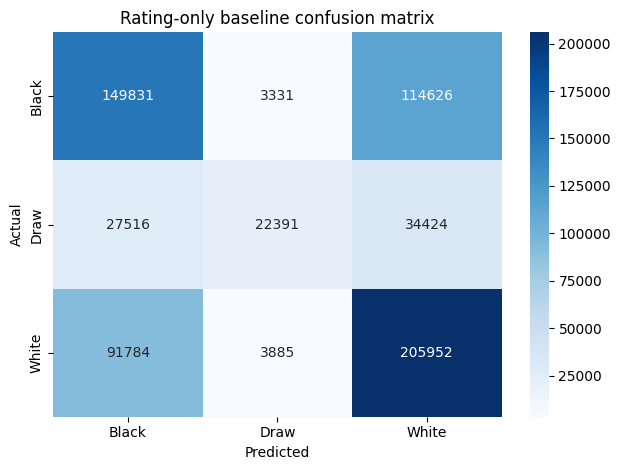

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Black", "Draw", "White"],
    yticklabels=["Black", "Draw", "White"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Rating-only baseline confusion matrix")
plt.tight_layout()
plt.show()